Latest data can be found at: https://www.zillow.com/research/data/

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a pandas DataFrame
df_usa = pd.read_csv("Metro_zhvf_growth_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv")


In [54]:
df_usa


,RegionID,SizeRank,RegionName,RegionType,StateName,BaseDate,2023-07-31,2023-09-30,2024-06-30
0,102001,0,United States,country,NaN,2023-06-30,0.6,1.6,6.3
1,394913,1,"New York, NY",msa,NY,2023-06-30,0.8,1.4,4.0
2,753899,2,"Los Angeles, CA",msa,CA,2023-06-30,1.2,3.6,5.3
3,394463,3,"Chicago, IL",msa,IL,2023-06-30,0.7,1.4,3.8
4,394514,4,"Dallas, TX",msa,TX,2023-06-30,0.4,1.2,5.1
...,...,...,...,...,...,...,...,...,...
890,753929,935,"Zapata, TX",msa,TX,2023-06-30,0.2,0.4,0.9
891,394743,936,"Ketchikan, AK",msa,AK,2023-06-30,-0.5,-0.9,0.9
892,753874,937,"Craig, CO",msa,CO,2023-06-30,1.0,2.5,8.7
893,395188,938,"Vernon, TX",msa,TX,2023-06-30,-1.2,-1.8,1.8


In [55]:
# Define the city and state you're interested in
cities_of_interest = ["Jacksonville, FL",
"Raleigh, NC",
"Charlotte, NC",
"Atlanta, GA",
"Seattle, WA",
"Denver, CO",
"Nashville, TN",
"Sacramento, CA"]

# Filter the DataFrame to include only the data for the specified cities
df_interesting_cities = df_usa[df_usa["RegionName"].isin(cities_of_interest)]



In [56]:
df_interesting_cities

,RegionID,SizeRank,RegionName,RegionType,StateName,BaseDate,2023-07-31,2023-09-30,2024-06-30
9,394347,9,"Atlanta, GA",msa,GA,2023-06-30,0.5,1.0,6.9
15,395078,15,"Seattle, WA",msa,WA,2023-06-30,0.7,1.4,4.3
19,394530,19,"Denver, CO",msa,CO,2023-06-30,0.4,0.8,3.3
23,394458,23,"Charlotte, NC",msa,NC,2023-06-30,0.8,1.9,8.2
26,395045,26,"Sacramento, CA",msa,CA,2023-06-30,0.5,0.7,2.9
36,394902,37,"Nashville, TN",msa,TN,2023-06-30,0.6,1.6,7.0
39,394714,40,"Jacksonville, FL",msa,FL,2023-06-30,0.2,0.7,6.6
42,395012,43,"Raleigh, NC",msa,NC,2023-06-30,0.6,1.5,6.7


In [57]:
# Get the necessary data for plotting
cities = df_interesting_cities["RegionName"]
dates = df_interesting_cities.columns[6:]  # Assuming the dates start from the 7th column in the CSV
data = df_interesting_cities.iloc[:, 6:]   # Extracting the numerical data for plotting


In [58]:
data

,2023-07-31,2023-09-30,2024-06-30
9,0.5,1.0,6.9
15,0.7,1.4,4.3
19,0.4,0.8,3.3
23,0.8,1.9,8.2
26,0.5,0.7,2.9
36,0.6,1.6,7.0
39,0.2,0.7,6.6
42,0.6,1.5,6.7


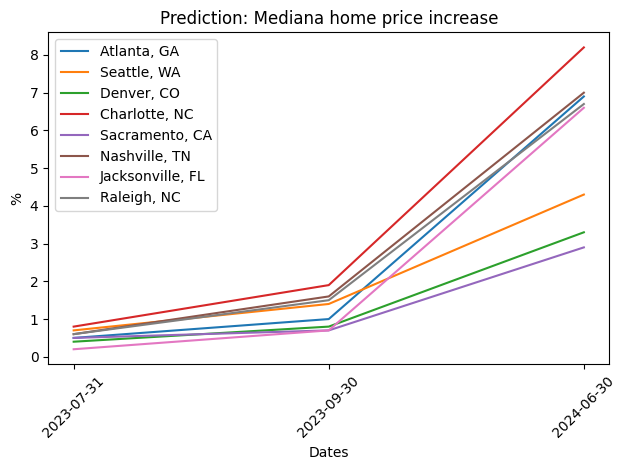

In [59]:

# Create a line plot for each city
for i, city in enumerate(cities):
    plt.plot(dates, data.iloc[i], label=city)


# Customize the plot
plt.xlabel("Dates")
plt.ylabel("%")
plt.title("Prediction: Mediana home price increase")
plt.xticks(rotation=45)
plt.legend(loc="upper left")
# Show the plot
plt.tight_layout()